In [1]:
%matplotlib inline
import warnings
warnings. filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib. pyplot as plt
import seaborn as sns
from sklearn. feature_extraction. text import TfidfTransformer
from sklearn. feature_extraction. text import TfidfVectorizer
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. metrics import confusion_matrix
from sklearn import metrics
from sklearn. metrics import roc_curve, auc
from nltk. stem. porter import PorterStemmer
import re
import string
from nltk. corpus import stopwords
from nltk. stem import PorterStemmer
from nltk. stem. wordnet import WordNetLemmatizer
from gensim. models import Word2Vec
from gensim. models import KeyedVectors
import pickle
import scipy as sp
from tqdm import tqdm
import os
from sklearn. cross_validation import train_test_split
from sklearn. neighbors import KNeighborsClassifier
from sklearn. metrics import accuracy_score
from sklearn. cross_validation import cross_val_score
from collections import Counter
from sklearn. metrics import accuracy_score
from sklearn import cross_validation
from sklearn. metrics import confusion_matrix
from sklearn. preprocessing import normalize
from sklearn import datasets, neighbors
from sklearn. metrics import roc_auc_score
from sklearn. preprocessing import StandardScaler

C:\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# [0] <font color='red'>Load Data

In [9]:
from scipy.sparse import load_npz

path = "C:/Python/Assignments/Preprocessing/"

train_bow = load_npz(path + "train_bow.npz")
test_bow = load_npz(path + "test_bow.npz")
cv_bow = load_npz(path + "cv_bow.npz")

train_tfidf = load_npz(path + "train_tfidf.npz")
test_tfidf = load_npz(path + "test_tfidf.npz")
cv_tfidf = load_npz(path + "cv_tfidf.npz")

with open("C:\Python\Assignments\Preprocessing\X_test.txt", "rb") as file:
    X_test = pickle.load(file)
with open("C:\Python\Assignments\Preprocessing\X_train.txt", "rb") as file:
    X_train = pickle.load(file)
with open("C:\Python\Assignments\Preprocessing\X_cv.txt", "rb") as file:
    X_cv = pickle.load(file)
    
with open("C:\Python\Assignments\Preprocessing\Y_test.txt", "rb") as file:
    Y_test = pickle.load(file)
with open("C:\Python\Assignments\Preprocessing\Y_train.txt", "rb") as file:
    Y_train = pickle.load(file)
with open("C:\Python\Assignments\Preprocessing\Y_cv.txt", "rb") as file:
    Y_cv = pickle.load(file)

with open(path + "X_cv_sum.txt", "rb") as file:
    X_cv_sum = pickle.load(file)
with open(path + "X_train_sum.txt", "rb") as file:
    X_train_sum = pickle.load(file)
with open(path + "X_test_sum.txt", "rb") as file:
    X_test_sum = pickle.load(file)

# [5] Assignment 4: Apply Naive Bayes

<ol>
    <li><strong>Apply Multinomial NaiveBayes on these feature sets</strong>
        <ul>
            <li><font color='red'>SET 1:</font>Review text, preprocessed one converted into vectors using (BOW)</li>
            <li><font color='red'>SET 2:</font>Review text, preprocessed one converted into vectors using (TFIDF)</li>
        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning(find best Alpha)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Consider a wide range of alpha values for hyperparameter tuning, start as low as 0.00001</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature importance</strong>
        <ul>
    <li>Find the top 10 features of positive class and top 10 features of negative class for both feature sets <font color='red'>Set 1</font> and <font color='red'>Set 2</font> using absolute values of `coef_` parameter of  <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>MultinomialNB</a> and print their corresponding feature names</li>
        </ul>
    </li>
    <br>
    <li><strong>Feature engineering</strong>
        <ul>
    <li>To increase the performance of your model, you can also experiment with with feature engineering like :</li>
            <ul>
            <li>Taking length of reviews as another feature.</li>
            <li>Considering some features from review summary as well.</li>
        </ul>
        </ul>
    </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure. Here on X-axis you will have alpha values, since they have a wide range, just to represent those alpha values on the graph, apply log function on those alpha values.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Applying Multinomial Naive Bayes

In [3]:
from sklearn.naive_bayes import MultinomialNB
def nb_all(train,test,cv):
    #Calculation NB for different k values
    auc_train = []
    auc_cv = []
    a = np.arange(0.0001,2,0.001)
    print("Starting classifier...")
    for i in tqdm(a):
        NB = MultinomialNB(alpha=i)
        NB.fit(train,Y_train)

        pred_prob = NB.predict_proba(cv)
        pred_prob_train = NB.predict_proba(train)

        #acc = accuracy_score(Y_cv, pred, normalize=True) * float(100)
        auc_cv.append(roc_auc_score(Y_cv, pred_prob[:,1]))
        auc_train.append(roc_auc_score(Y_train, pred_prob_train[:,1]))

    #Plotting the AUC curve for train and test data

    #Print the graph

    plt.plot(a,auc_train,'r', label = 'Train Data')
    plt.plot(a,auc_cv,'b', label = 'CV Data')
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("AUC Values for Train and CV Data\n")
    plt.xlabel("Hyper Parameter(alpha)")
    plt.ylabel("AUC Value")
    plt.show()


    #Get k value for max auc in cv data
    mx = 0
    for i in range(len(auc_cv)):
        if(auc_cv[i]> auc_cv[mx]):
            mx = i
    opt = a[mx] 
    print("The optimal value of alpha = ", opt)

    print("\nClassifying Test Data\n\n")
    NB = MultinomialNB(alpha=opt)
    NB.fit(train,Y_train)

    pred = NB.predict(test)
    pred_prob = NB.predict_proba(test)

    #pred_train = NB.predict(X_train_vec)
    pred_prob_train = NB.predict_proba(train)

    #ROC Values comutation
    fpr, tpr, threshold = roc_curve(Y_train, pred_prob_train[:,1])
    fpr1, tpr1, threshold1 = roc_curve(Y_test, pred_prob[:,1])
    print("The AUC value for test data is ",roc_auc_score(Y_test, pred_prob[:,1]))

    plt.plot(fpr,tpr,'r', label = 'Train Data')
    plt.plot(fpr1,tpr1,'b', label = 'Test Data')
    plt.ylim(0,1)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(True)
    plt.title("ROC Curve for Train and Test Data\n")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.show()

    #Confusion Matrix
    cm = confusion_matrix(Y_test,pred)
    tn, fp, fn, tp = cm.ravel()

    # https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
    # Code for drawing seaborn heatmaps
    class_names = ['0','1']
    df_heatmap = pd.DataFrame(cm, index=class_names, columns=class_names )
    fig = plt.figure(figsize=(5,3))
    heatmap = sns.heatmap(df_heatmap, annot=True, fmt="d")

    # Setting tick labels for heatmap
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
    plt.ylabel('True label',size=18)
    plt.xlabel('Predict label',size=18)
    plt.title("Confusion Matrix\n",size=24)
    plt.show()
    
    

## [5.1] Applying Naive Bayes on BOW,<font color='red'> SET 1</font>

Starting classifier...


100%|██████████████████████████████████████| 1000/1000 [01:16<00:00, 13.89it/s]


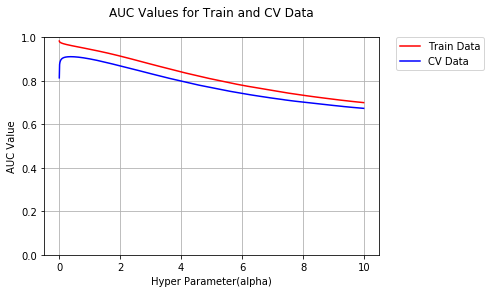

The optimal value of alpha =  0.3801

Classifying Test Data


The AUC value for test data is  0.904419709219364


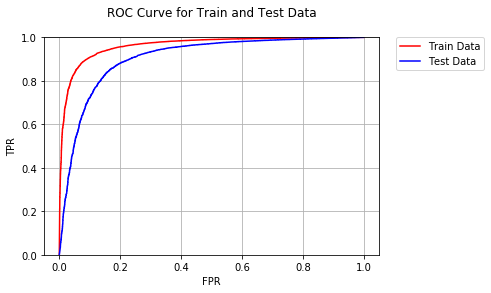

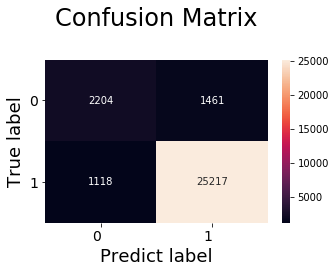

In [58]:
nb_all(train_bow,test_bow,cv_bow)


### [5.1.1] Top 10 important features of positive class from<font color='red'> SET 1</font>

In [10]:
NB = MultinomialNB(alpha=0.3801)
NB.fit(train_bow,Y_train)
feat_log = NB.feature_log_prob_

count_vect = CountVectorizer()
p = count_vect.fit_transform(X_train)

p = pd.DataFrame(feat_log.T,columns=['-ve','+ve'])
p['feature'] = count_vect.get_feature_names()

In [11]:
q = p.sort_values(by = '+ve',kind = 'quicksort',ascending= False)
print("Top 10  important features of positive class", np.array(q['feature'][:10]))

Top 10  important features of positive class ['not' 'like' 'good' 'great' 'tea' 'one' 'taste' 'flavor' 'product' 'love']


### [5.1.2] Top 10 important features of negative class from<font color='red'> SET 1</font>

In [12]:
r = p.sort_values(by = '-ve',kind = 'quicksort',ascending= False)
print("Top 10  important features of negative class", np.array(r['feature'][:10]))

Top 10  important features of negative class ['not' 'like' 'product' 'taste' 'would' 'one' 'good' 'no' 'flavor' 'tea']


## [5.2] Applying Naive Bayes on TFIDF,<font color='red'> SET 2</font>

Starting classifier...


100%|██████████████████████████████████████| 1000/1000 [01:14<00:00, 13.73it/s]


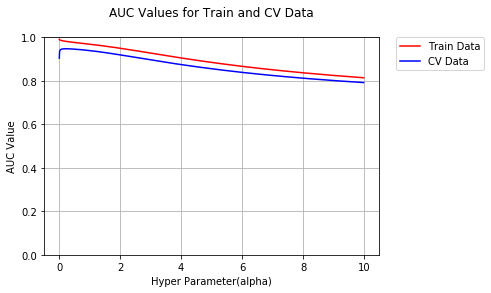

The optimal value of alpha =  0.2201

Classifying Test Data


The AUC value for test data is  0.9448696315264209


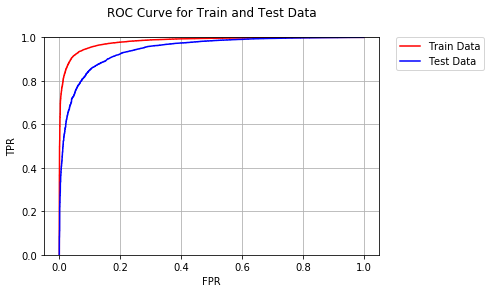

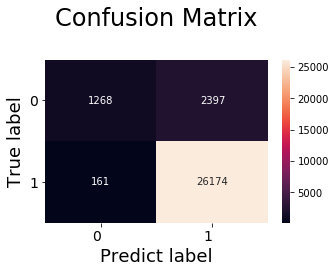

In [245]:
# Please write all the code with proper documentation
nb_all(train_tfidf,test_tfidf,cv_tfidf)

### [5.2.1] Top 10 important features of positive class from<font color='red'> SET 2</font>

In [246]:
# Please write all the code with proper documentation

NB = MultinomialNB(alpha=0.2201)
NB.fit(train_tfidf,Y_train)
feat_log = NB.feature_log_prob_

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
p = tf_idf_vect.fit_transform(X_train)
feature_names = tf_idf_vect.get_feature_names()


In [249]:
p = pd.DataFrame(feat_log.T,columns=['-ve','+ve'])
p['feature'] = feature_names

In [250]:
q = p.sort_values(by = '+ve',kind = 'quicksort',ascending= False)
print("Top 10  important features of positive class", np.array(q['feature'][:10]))

Top 10  important features of positive class ['not' 'great' 'good' 'tea' 'like' 'love' 'product' 'taste' 'coffee' 'one']


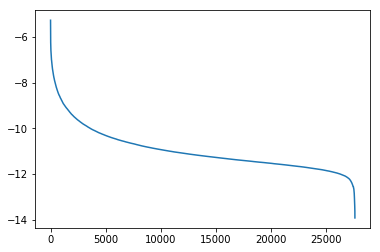

In [262]:
plt.plot(np.arange(27589),np.array(q['+ve']))
plt.show()

### [5.2.2] Top 10 important features of negative class from<font color='red'> SET 2</font>

In [251]:
# Please write all the code with proper documentation
r = p.sort_values(by = '-ve',kind = 'quicksort',ascending= False)
print("Top 10  important features of negative class", np.array(r['feature'][:10]))

Top 10  important features of positive class ['not' 'like' 'product' 'would' 'taste' 'one' 'no' 'flavor' 'coffee'
 'good']


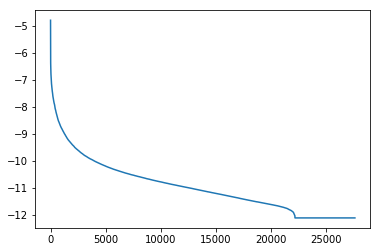

In [263]:
plt.plot(np.arange(27589),np.array(r['-ve']))
plt.show()

# [6] Conclusions

In [14]:
# Please compare all your models using Prettytable library
from prettytable import from_csv
with open("table.csv", "r") as fp: 
    x = from_csv(fp)
    
print(x)

+------------+-------------+-----------------+------+
| Vectorizer |    Model    | Hyper Parameter | AUC  |
+------------+-------------+-----------------+------+
|    BOW     | Naive Bayes |      0.3801     | 0.9  |
|   TFIDF    | Naive Bayes |      0.2201     | 0.95 |
+------------+-------------+-----------------+------+


1. The Naive Bayes is surely faster than KNN classifier and it gives better results with less training time.
2. In Naive Bayes TFIDF featurisation gave almost 95% AUC value where as BOW gave almost 90% of the same.
3. We can further improve the model by taking more data points, and by taking some other features that may provide us with better insight about the data.